   Zip Code  Crime rates
0     15212        34146
7     15210        25467
15    15206        24106
12    15219        21958
4     15203        19300
3     15222        17142
8     15213        13481
19    15217        11487
23    15208        11349
2     15214         9465


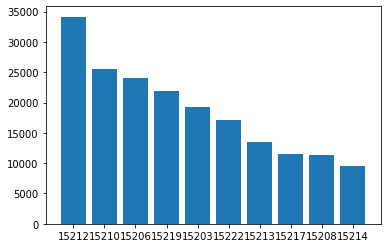

In [22]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def getzc(incidentLocation):#this method is used to take the information under the Incident Location column and get the zip code
    zc = r'\b\d{5}\b' #matches 5 digits at the end of a string
    y = re.search(zc, incidentLocation)
    
    if y:#zip code is found
        return y.group(0)
    else:#no zip code is found
        return None
    
chip = pd.read_csv("Police Incident Blotter data.csv", sep=",")



zipList = []
for i in range(312145):
    x = chip.iloc[i, 4]
    xzc = getzc(x)
    #print(xzc) #will print either a 5 digit zip code or "None"
    zipList.append(xzc)
    
d = dict()
for c in zipList:
    if c not in d:
        d[c] = 1
    else:
        d[c] = d[c] + 1
#print("this is the number of crimes per zip code from January 1st, 2016, to Febuary 18th, 2023")
#print(d)
#print("there are ", len(d), " different zip codes in this data set")




column_names=["Zip Code","Crime rates"]

#df = pd.DataFrame(d, index=['i',], columns=column_names)
df = pd.DataFrame(list(d.items()), columns=column_names)
df = df.sort_values('Crime rates', ascending=False)
                   
top_60_values = df.head(60)
#print(top_60_values)

#type(df)
top_60_values = top_60_values.drop(9)
dfTop10 = top_60_values.head(10)
plt.bar(dfTop10['Zip Code'], dfTop10['Crime rates'])
print(dfTop10)

As shown above, these are the top 10 worst zip codes in Pittburgh in terms of safety. Any neighboorhood that contains these zip codes should not be the best neighboorhood in Pittsburgh.